In [1]:
from app.parser import *

{'07/04/21': 'haha ja, in nam pol te stvari tut dobr pokazat kako se primerjajo. itd. :D. pol nek tak malo bolÅ¡i avto. najprej en clio. mislm da bi vsakiÄ\x8d pred dirko mogl neki tazga narest. haha, sam vseen zgleda zalostno pocasn napram formulam, ne vem a ko je safety car voz na polno al neki u izi :D. hud je <3. ni luÅ¡tkan!', '06/04/21': 'je luskan ja :D. im in love. https://www.youtube.com/watch?v=h7rNMmcNz-c. medijska diskreditacija na popno. hahaha ok. pa zarad enga videja k se norÄ\x8duje iz ene Å¾enske ga Å¡e tok bolj ne marajo. sam ga je fotrov denar spravu v f1. finta je da je Å¾e v formuli 2 bil neimpresiven. Å¡e predno se je zaÄ\x8del ga niso maral. kako ga lahko ze ne marajo haha. pa a ni zdej prvic vozu on. pomoje je dost od kamere odvisno, te profi so tok gladke da se nc ne cut vec hitrosti :D. Ga ne marajo prevec ljudje. Mazespin mu pa kr ustreza :D. Hahaha ja to prevec vsega motri natlacjo. Men se isto tak zdi, da vcas kaksn amater zna bols posnet obcutek na progu. 

In [2]:
messages = parse_messenger()
grouped = group_by_day(messages)

In [3]:
counts_by_day = {k: len(grouped[k]) for k in grouped}
counts_by_day

{'07/04/21': 314,
 '06/04/21': 845,
 '05/04/21': 478,
 '04/04/21': 53,
 '03/04/21': 561,
 '02/04/21': 501,
 '01/04/21': 2195}

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

def count_word_frequency_in_text(text):
    # Tokenizing the text
    stopWords = set(stopwords.words("slovene"))
    stopWords = stopWords.union({'.',',',':','!','?','haha','hahah','hahaha'})
    words = word_tokenize(text)
    
    # Creating a frequency table to keep the 
    # score of each word
    
    freqTable = dict()
    for word in words:
        word = word.lower()
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1
    return freqTable

In [6]:
count_word_frequency_in_text(grouped['01/04/21']);

In [11]:
def format_date_for_sorting(date):
    return date[-2:] + '/' + date[-5:-3] + '/' + date[:-6]

In [12]:
format_date_for_sorting('01/04/21')

'21/04/01'

In [13]:
counts_by_day_sorted = sorted([(format_date_for_sorting(k), counts_by_day[k]) for k in counts_by_day])
counts_by_day_sorted

[('21/04/01', 2195),
 ('21/04/02', 501),
 ('21/04/03', 561),
 ('21/04/04', 53),
 ('21/04/05', 478),
 ('21/04/06', 845),
 ('21/04/07', 314)]

<ipython-input-19-986647d5a67c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(days)


[Text(-1.0, 0, '21/04/01'),
 Text(0.0, 0, '21/04/02'),
 Text(1.0, 0, '21/04/03'),
 Text(2.0, 0, '21/04/04'),
 Text(3.0, 0, '21/04/05'),
 Text(4.0, 0, '21/04/06'),
 Text(5.0, 0, '21/04/07'),
 Text(6.0, 0, ''),
 Text(7.0, 0, '')]

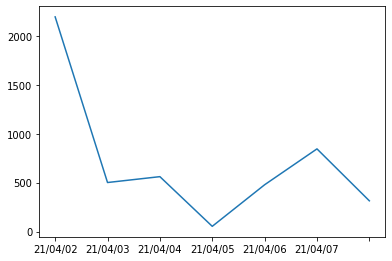

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

days = [x[0] for x in counts_by_day_sorted]
counts = [x[1] for x in counts_by_day_sorted]
ax.plot(counts)
ax.set_xticklabels(days)